# Table of contents
1. [Cleaning](#cleaning)
2. [Exploring to Answer Unasked Questions (EDA)](#myanswers)
3. [Machine Learning](#ml)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from datetime import datetime

## Cleaning the Dataframe <a name="cleaning"></a>

In [2]:
df = pd.read_csv("daily-inmates-in-custody.csv")
df.head().T

,0,1,2,3,4
INMATEID,20159382,20120917,20174220,20174619,20175929
ADMITTED_DT,2015-11-14T18:22:02,2013-10-11T18:34:33,2016-10-25T16:33:35,2016-11-03T18:11:30,2016-12-09T02:20:21
DISCHARGED_DT,NaN,NaN,NaN,NaN,NaN
CUSTODY_LEVEL,NaN,NaN,NaN,NaN,NaN
BRADH,N,N,N,N,N
RACE,NaN,NaN,NaN,NaN,NaN
GENDER,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
SEALED,N,N,N,N,N


In [3]:
original_colnames = df.columns
new_colnames = ['INMATE_ID', 'ADMITTED_DT', 'DISCHARGED_DT', 'CUSTODY_LEVEL', 'MENTAL_OBSERVATION', 'RACE', 'GENDER', 'AGE', 'INMATE_STATUS_CODE', 'SEALED', 'GANG_AFFILIATION', 'TOP_CHARGE', 'INFRACTION']
df = df.rename(columns=dict(zip(original_colnames, new_colnames)))
df.head().T

,0,1,2,3,4
INMATE_ID,20159382,20120917,20174220,20174619,20175929
ADMITTED_DT,2015-11-14T18:22:02,2013-10-11T18:34:33,2016-10-25T16:33:35,2016-11-03T18:11:30,2016-12-09T02:20:21
DISCHARGED_DT,NaN,NaN,NaN,NaN,NaN
CUSTODY_LEVEL,NaN,NaN,NaN,NaN,NaN
MENTAL_OBSERVATION,N,N,N,N,N
RACE,NaN,NaN,NaN,NaN,NaN
GENDER,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
SEALED,N,N,N,N,N


In [4]:
df.tail().T

,8223,8224,8225,8226,8227
INMATE_ID,20101081,80499,168995,20197793,20185441
ADMITTED_DT,2018-08-27T12:43:45,2018-08-26T01:16:28,2018-08-27T13:46:28,2018-08-24T20:59:00,2018-06-27T19:18:55
DISCHARGED_DT,NaN,NaN,NaN,NaN,NaN
CUSTODY_LEVEL,MED,MIN,MED,MIN,MAX
MENTAL_OBSERVATION,N,N,N,N,Y
RACE,O,B,O,W,O
GENDER,M,M,M,F,M
AGE,48,51,30,42,21
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
SEALED,N,N,N,N,N


It looks like a lot of the inmates have not been released yet. Also, the older the data is, the less complete it is. Race, gender, age, custody level and top charge are values that are missing from the oldest records. We can also see from the head of the dataframe that the dataframe is not in chronological order.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8228 entries, 0 to 8227
Data columns (total 13 columns):
INMATE_ID             8228 non-null int64
ADMITTED_DT           8228 non-null object
DISCHARGED_DT         0 non-null float64
CUSTODY_LEVEL         8107 non-null object
MENTAL_OBSERVATION    8228 non-null object
RACE                  8206 non-null object
GENDER                8206 non-null object
AGE                   8218 non-null float64
INMATE_STATUS_CODE    8228 non-null object
SEALED                8228 non-null object
GANG_AFFILIATION      8228 non-null object
TOP_CHARGE            7294 non-null object
INFRACTION            8228 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 835.7+ KB


We will check to see if all of the files of the inmates are sealed since that is what the head and tail of the dataframe seem to indicate.

In [6]:
sealed = df['SEALED'].dropna()
sealed = sealed.map({'Y' :0, 'N' :1})
sum(sealed)/len(sealed)

1.0

This shows that 100% of the values for the SEALED column are 'N' for no. Since they are all consistent, we will remove the column from the dataframe. It will have no bearing on our results unless and until the results can be compared with results where the inmates' records are sealed.

We will also remove the column DISCHARGED_DT from the dataframe as all of those values are NaN.

In [7]:
df = df.drop(['DISCHARGED_DT', 'SEALED'],axis=1)

In [8]:
df.head()

,INMATE_ID,ADMITTED_DT,CUSTODY_LEVEL,MENTAL_OBSERVATION,RACE,GENDER,AGE,INMATE_STATUS_CODE,GANG_AFFILIATION,TOP_CHARGE,INFRACTION
0,20159382,2015-11-14T18:22:02,NaN,N,NaN,NaN,NaN,DE,N,NaN,N
1,20120917,2013-10-11T18:34:33,NaN,N,NaN,NaN,NaN,DE,N,NaN,N
2,20174220,2016-10-25T16:33:35,NaN,N,NaN,NaN,NaN,DE,N,NaN,N
3,20174619,2016-11-03T18:11:30,NaN,N,NaN,NaN,NaN,DE,N,NaN,N
4,20175929,2016-12-09T02:20:21,NaN,N,NaN,NaN,NaN,DE,N,NaN,N


According to cell 5, there are more than 100 missing values from TOP_CHARGE and CUSTODY_LEVEL. However there are only 22 missing from RACE and GENDER and less missing from AGE. Since that is less than 0.2% of overall data, we will drop the rows where there are any NaN values in RACE and GENDER. We will impute the missing values of TOP_CHARGE as -1 so that they can be used in the predictive model we create later. We will not delete the rows that have missing values from CUSTODY_LEVEL. We will attempt to predict these values in the Machine Learning portion of this capstone.

In [9]:
df = df.dropna(axis=0, how='any', subset=['RACE', 'GENDER']) 
df['TOP_CHARGE'] = df['TOP_CHARGE'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8206 entries, 6 to 8227
Data columns (total 11 columns):
INMATE_ID             8206 non-null int64
ADMITTED_DT           8206 non-null object
CUSTODY_LEVEL         8095 non-null object
MENTAL_OBSERVATION    8206 non-null object
RACE                  8206 non-null object
GENDER                8206 non-null object
AGE                   8206 non-null float64
INMATE_STATUS_CODE    8206 non-null object
GANG_AFFILIATION      8206 non-null object
TOP_CHARGE            8206 non-null object
INFRACTION            8206 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 769.3+ KB


Removing the rows that had missing values in RACE and GENDER also removed 12 values that could have been used for training a predictive model later to help predict CUSTODY_LEVEL. As that still leaves us with more than a hundred values to guess, we will consider that an acceptable loss to this capstone.

In [10]:
df.head().T

,6,7,8,9,10
INMATE_ID,56220,99982,110074,20146640,20183607
ADMITTED_DT,2017-04-04T13:05:26,2017-08-21T12:37:51,2017-06-02T20:47:27,2017-08-01T11:45:11,2017-06-18T12:05:26
CUSTODY_LEVEL,MIN,MED,MAX,MAX,MIN
MENTAL_OBSERVATION,Y,Y,N,Y,Y
RACE,B,O,O,B,B
GENDER,M,M,M,M,M
AGE,42,59,38,20,63
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
GANG_AFFILIATION,N,N,N,Y,N
TOP_CHARGE,120.05,130.50,110-125.25,160.10,120.10


Now we will break the ADMITTED_DT into column for year, month, day, and hour. This will break the timestamps into more readable data and will be easier for any of the supervised machine learning methods we decide to use later on.

In [13]:
df['YEAR'] = df['ADMITTED_DT'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').year)
df['MONTH'] = df['ADMITTED_DT'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').month)
df['DAY'] = df['ADMITTED_DT'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').day)
df['HOUR'] = df['ADMITTED_DT'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').hour)

In [14]:
df.head().T

,6,7,8,9,10
INMATE_ID,56220,99982,110074,20146640,20183607
ADMITTED_DT,2017-04-04T13:05:26,2017-08-21T12:37:51,2017-06-02T20:47:27,2017-08-01T11:45:11,2017-06-18T12:05:26
CUSTODY_LEVEL,MIN,MED,MAX,MAX,MIN
MENTAL_OBSERVATION,Y,Y,N,Y,Y
RACE,B,O,O,B,B
GENDER,M,M,M,M,M
AGE,42,59,38,20,63
INMATE_STATUS_CODE,DE,DE,DE,DE,DE
GANG_AFFILIATION,N,N,N,Y,N
TOP_CHARGE,120.05,130.50,110-125.25,160.10,120.10


In [15]:
df = df.drop(['ADMITTED_DT'],axis=1)

## Exploratory Data Analysis (EDA) <a name="myanswers"></a>

Let's see some graphs to explore the data.

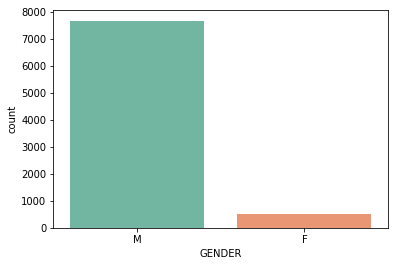

In [16]:
sns.countplot(x = "GENDER", data = df, palette="Set2")

In [32]:
female = df[df.GENDER == 'F']
male = df[df.GENDER == 'M'] 
female.head(), male.head()

(     INMATE_ID CUSTODY_LEVEL MENTAL_OBSERVATION RACE GENDER   AGE  \
 21    20164663           MED                  Y    B      F  26.0   
 50    20178702           MED                  Y    B      F  24.0   
 131   20168420           MED                  Y    B      F  57.0   
 156   20187452           MIN                  Y    B      F  45.0   
 174   20181480           MED                  N    O      F  44.0   
 
     INMATE_STATUS_CODE GANG_AFFILIATION TOP_CHARGE INFRACTION  YEAR  MONTH  \
 21                  DE                N     125.25          N  2016      3   
 50                  DE                N     120.10          N  2017      2   
 131                 DE                N     125.25          N  2016      6   
 156                 DE                N     125.15          N  2017      9   
 174                 DE                N         -1          N  2017      4   
 
      DAY  HOUR  
 21    16    11  
 50    19    21  
 131    9    16  
 156   29    15  
 174   28   

In [33]:
ratio = male.count()/female.count()
ratio

INMATE_ID             14.512287
CUSTODY_LEVEL         14.448473
MENTAL_OBSERVATION    14.512287
RACE                  14.512287
GENDER                14.512287
AGE                   14.512287
INMATE_STATUS_CODE    14.512287
GANG_AFFILIATION      14.512287
TOP_CHARGE            14.512287
INFRACTION            14.512287
YEAR                  14.512287
MONTH                 14.512287
DAY                   14.512287
HOUR                  14.512287
dtype: float64

There are 14.45 times as many incarcertaed men as there are women. 

Let us compare the incarceration of males and females in a more proportioned graph.

Text(0.5,1,'Number of Prisoners who Committed at least One Infraction')

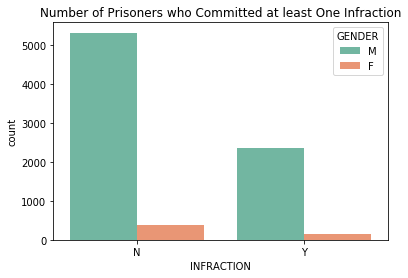

In [107]:
sns.countplot(x = 'INFRACTION', hue = 'GENDER', data = df, palette="Set2")
plt.title('Number of Prisoners who Committed at least One Infraction')

Text(0.5,1,'Number of Male Prisoners Under Mental Observation')

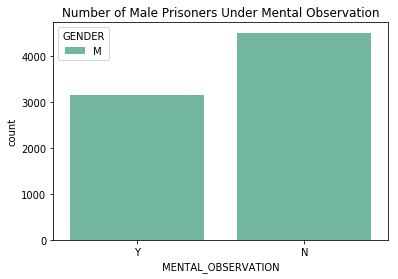

In [48]:
sns.countplot(x = 'MENTAL_OBSERVATION', hue = 'GENDER', data = male, palette="Set2")
plt.title('Number of Male Prisoners Under Mental Observation')

Text(0.5,1,'Number of Female Prisoners Under Mental Observation')

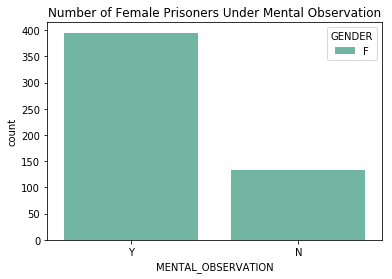

In [49]:
sns.countplot(x = 'MENTAL_OBSERVATION', hue = 'GENDER', data = female, palette="Set2")
plt.title('Number of Female Prisoners Under Mental Observation')

A significantly higher ratio of women than men are placed under mental observation.

Text(0.5,1,'Number of Male Prisoners with Gang Affiliations')

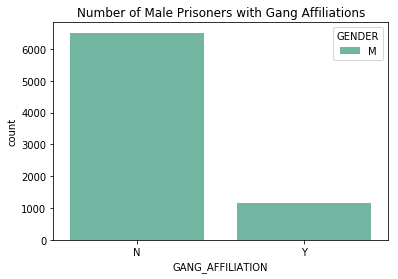

In [50]:
sns.countplot(x = 'GANG_AFFILIATION', hue = 'GENDER', data = male, palette="Set2")
plt.title('Number of Male Prisoners with Gang Affiliations')

Text(0.5,1,'Number of Female Prisoners with Gang Affiliations')

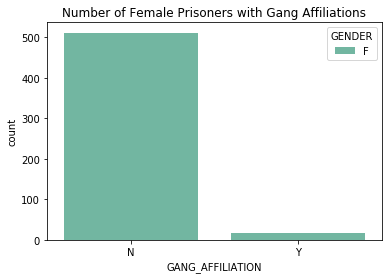

In [51]:
sns.countplot(x = 'GANG_AFFILIATION', hue = 'GENDER', data = female, palette="Set2")
plt.title('Number of Female Prisoners with Gang Affiliations')

Text(0.5,1,'Number of Infractions with Gang Affiliations')

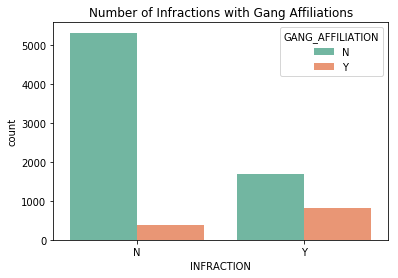

In [111]:
sns.countplot(x = 'INFRACTION', hue = 'GANG_AFFILIATION', data = df, palette="Set2")
plt.title('Number of Infractions with Gang Affiliations')

Thankfully there does not seem to be a great amount of relative gang affiliation among the inmates. We expected to see higher numbers but we are happily wrong. We are hoping that means that gang life is not proliferant in the City of New York instead of taking the low numbers to mean that a good number of gang members have not caught or incarcerated yet. It could be that the gang members are committing no crime to be arrested for or that they are very good at not getting caught. We will leave that to the appropriate departments and experts to decide.

Text(0.5,1,'Level of Security of Prisoners by Gender')

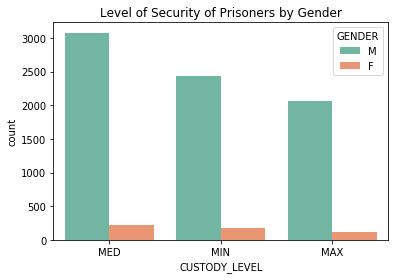

In [99]:
sns.countplot(x = 'CUSTODY_LEVEL', hue = 'GENDER', data = df, palette="Set2", order = df['CUSTODY_LEVEL'].value_counts().index)
plt.title('Level of Security of Prisoners by Gender')

Text(0.5,1,'Level of Security of Male Prisoners')

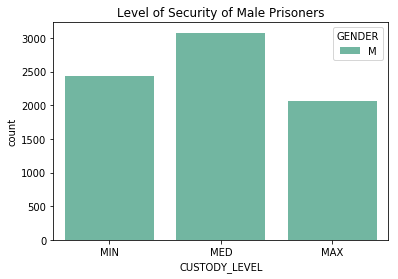

In [98]:
sns.countplot(x = 'CUSTODY_LEVEL', hue = 'GENDER', data = male, palette="Set2")
plt.title('Level of Security of Male Prisoners')

Text(0.5,1,'Level of Security of Female Prisoners')

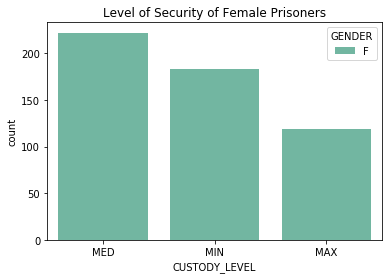

In [100]:
sns.countplot(x = 'CUSTODY_LEVEL', hue = 'GENDER', data = female, palette="Set2")
plt.title('Level of Security of Female Prisoners')

We can see that the highest proportion of men and women are at medium security custody level and that the least proportion is in maximum security. That holds true for both genders. 

Let us now see what the top 10 top charges are.

In [67]:
df['TOP_CHARGE'].value_counts().head(11)

-1            922
125.25        521
160.15        407
120.05        349
110-125.25    347
265.03        321
140.25        317
220.39        284
220.16        281
160.10        268
140.20        237
Name: TOP_CHARGE, dtype: int64

Recall that a '-1' was imputed in place of all the TOP_CHARGE values that were missing from the original dataframe. Using the New York State Law website, the following labels to the above charges were found. The website is here: http://ypdcrime.com/. 

- 125.25 is 'Murder in the second degree'.
- 160.15 is 'Robbery in the first degree'.
- 110-125.25, if treated as a range, is 'Attempt to commit a crime' to 'Murder in the first degree'. No singular offense was found for this charge.
- 120.05 is 'Assault in the second degree'.
- 265.03 is 'Criminal possession of a weapon in the second degree'.
- 140.25 is 'Burglary in the second degree'.
- 220.39 is 'Criminal sale of a controlled substance in the third degree'.
- 220.16 is 'Criminal possession of a controlled substance in the third degree'.
- 160.10 is 'Robbery in the second degree'.
- 140.20 is 'Burglary in the third degree'.

We can see that four of ten of these most frequent charges are of or relating to theft or the intention to commit theft. Six of the charges require face-to-face interaction with another person, presumably a victim.

Text(0.5,0,'Age')

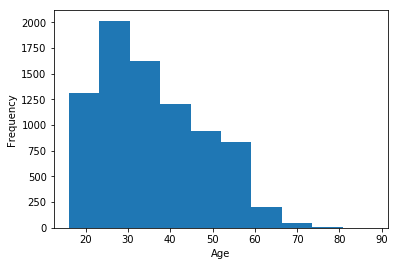

In [75]:
age_df = df["AGE"].dropna()
age_df.plot.hist()
plt.xlabel("Age")

In [76]:
df3 = df[df['AGE'] < 18]
df3.head()

,INMATE_ID,CUSTODY_LEVEL,MENTAL_OBSERVATION,RACE,GENDER,AGE,INMATE_STATUS_CODE,GANG_AFFILIATION,TOP_CHARGE,INFRACTION,YEAR,MONTH,DAY,HOUR
33,20175963,NaN,N,B,M,17.0,DE,N,-1,N,2016,12,9,20
184,20186674,MAX,N,B,M,17.0,DE,Y,160.15,Y,2017,9,8,13
501,20180140,MAX,Y,O,M,17.0,DE,Y,120.10,Y,2017,3,28,1
1190,20191841,MAX,Y,B,M,17.0,DE,N,110-125.25,Y,2018,2,3,2
1236,20183832,MAX,Y,O,M,17.0,DE,Y,160.10,Y,2018,3,12,11


In [77]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 33 to 8035
Data columns (total 14 columns):
INMATE_ID             94 non-null int64
CUSTODY_LEVEL         87 non-null object
MENTAL_OBSERVATION    94 non-null object
RACE                  94 non-null object
GENDER                94 non-null object
AGE                   94 non-null float64
INMATE_STATUS_CODE    94 non-null object
GANG_AFFILIATION      94 non-null object
TOP_CHARGE            94 non-null object
INFRACTION            94 non-null object
YEAR                  94 non-null int64
MONTH                 94 non-null int64
DAY                   94 non-null int64
HOUR                  94 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 11.0+ KB


Text(0.5,1,'Level of Security of 16-17 YO Prisoners by Gender')

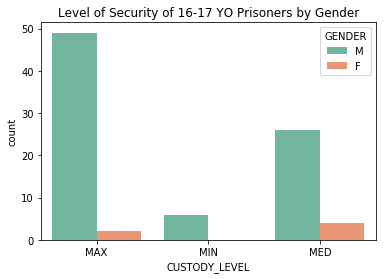

In [78]:
sns.countplot(x = 'CUSTODY_LEVEL', hue = 'GENDER', data = df3, palette="Set2")
plt.title('Level of Security of 16-17 YO Prisoners by Gender')

Text(0.5,1,'Gang Affiliation of 16-17 YO Prisoners by Gender')

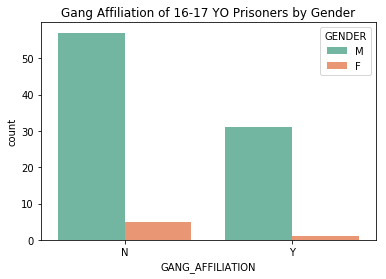

In [79]:
sns.countplot(x = 'GANG_AFFILIATION', hue = 'GENDER', data = df3, palette="Set2")
plt.title('Gang Affiliation of 16-17 YO Prisoners by Gender')

A majority of the 16-17 year olds are placed in maximum security custody levels! However we can see, thankfully, that a majority of them do not have gang affiliations at the time of their incarceration using the yscale. However the proportions are larger than that of the adults.

In [80]:
df3['TOP_CHARGE'].value_counts().head(11)

160.15        23
160.10        15
110-125.25    12
265.03         8
125.25         6
-1             6
105.15         4
140.25         3
120.00         2
110-160.15     2
110-160.10     1
Name: TOP_CHARGE, dtype: int64

The most frequent charges for 16-17 year olds is as follows:

- 160.15 is 'Robbery in the first degree'.
- 160.10 is 'Robbery in the second degree'.
- 110-125.25, if treated as a range, is 'Attempt to commit a crime' to 'Murder in the first degree'. No singular offense was found for this charge.
- 265.03 is 'Criminal possession of a weapon in the second degree'.
- 125.25 is 'Murder in the second degree'.
- 105.15 is 'Conspiracy in the second degree'.
- 140.25 is 'Burglary in the second degree'.
- 120.00 is 'Assault in the third degree'.
- 110-160.15, if treated as a range, is 'Attempt to commit a crime' to 'Robbery in the first degree'. No singular offense was found for this charge.
- 110-160.10, if treated as a range, is 'Attempt to commit a crime' to 'Robbery in the second degree'. No singular offense was found for this charge. 

Five of these top ten most frequent charges involve theft or the intent to commit theft. Four of the top ten required face-to-face interaction with, again presumably, a victim.

Two of the most frequent charges for 16-17 year olds were of the murder variety. Same with the 18+ year olds. However, we can see in the graphs that a majority of the adults are under a medium CUSTODY_LEVEL whereas a majority of the 16-17 year olds are under a maximum CUSTODY_LEVEL.

Now that we've explored age and gender, let's take a look at race.

Text(0,0.5,'Number of Inmates')

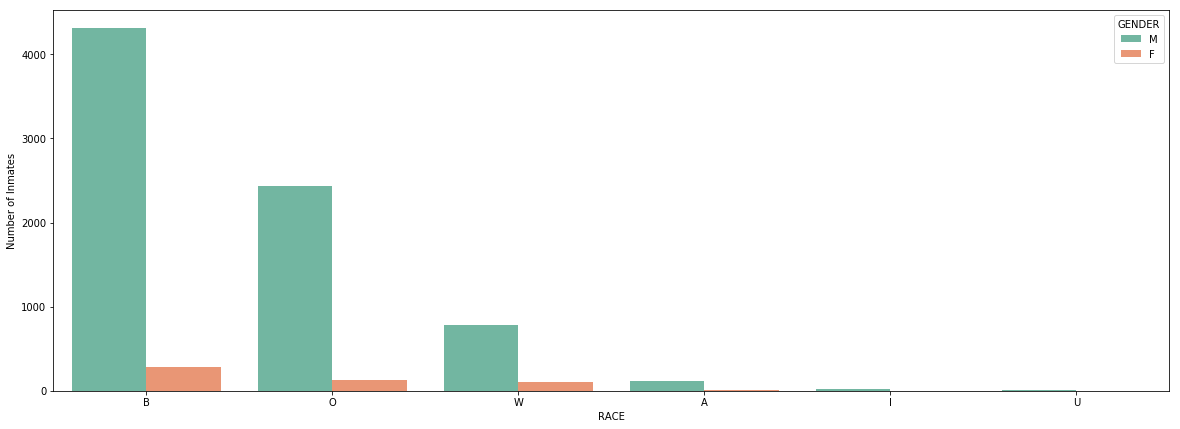

In [81]:
plt.figure(figsize=(20,7))
sns.countplot(x='RACE', hue='GENDER', data=df, palette="Set2")
plt.ylabel("Number of Inmates")

Text(0,0.5,'Number of Inmates')

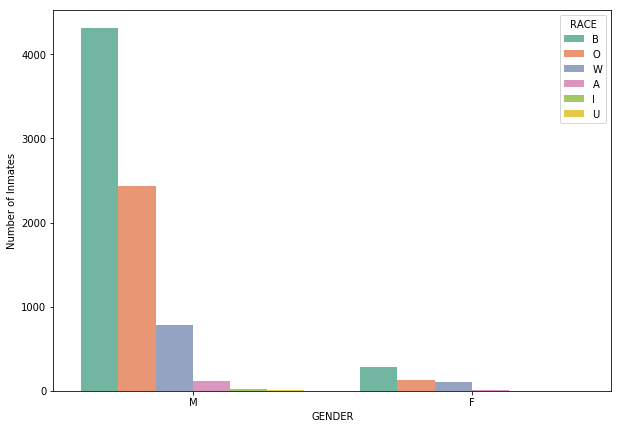

In [82]:
plt.figure(figsize=(10,7))
sns.countplot(x='GENDER', hue='RACE', data=df, palette="Set2")
plt.ylabel("Number of Inmates")

These two graphs present the SAME INFORMATION but in two different visualizations.

Text(0,0.5,'Number of Inmates')

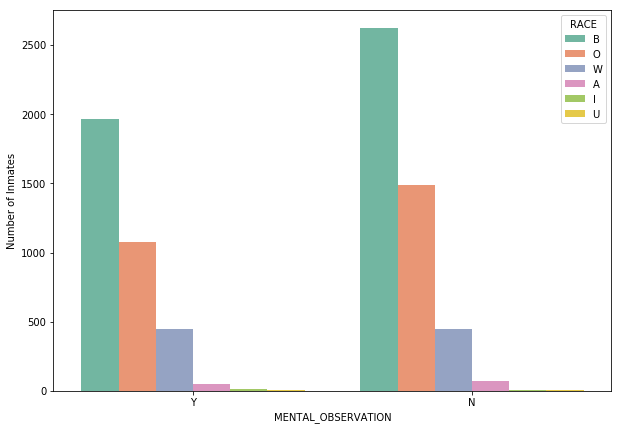

In [83]:
plt.figure(figsize=(10,7))
sns.countplot(x='MENTAL_OBSERVATION', hue='RACE', data=df, palette="Set2")
plt.ylabel("Number of Inmates")

Text(0.5,1,'Race on Infraction')

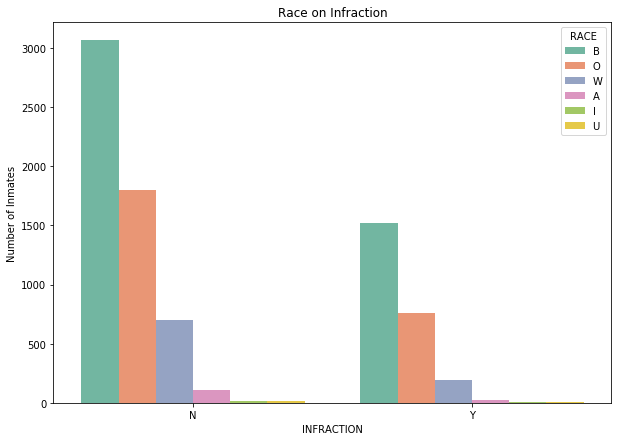

In [103]:
plt.figure(figsize=(10,7))
sns.countplot(x='INFRACTION', hue='RACE', data=df, palette="Set2")
plt.ylabel("Number of Inmates")
plt.title('Race on Infraction')

Text(0.5,1,'Race on Custody Level')

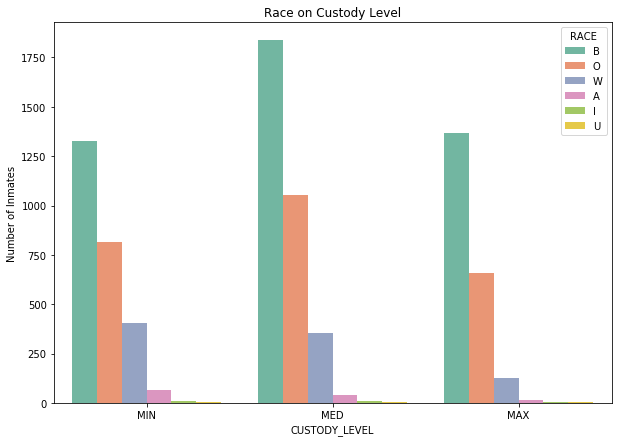

In [104]:
plt.figure(figsize=(10,7))
sns.countplot(x='CUSTODY_LEVEL', hue='RACE', data=df, palette="Set2")
plt.ylabel("Number of Inmates")
plt.title('Race on Custody Level')

In relevance to race, there is nothing noteworthy when comparing the genders in incarceration. Race has no bearing on the existence of infractions either. There are proportionally less of each race under mental observation except for the White and Islander populations. Those races have more people under mental observation than not. 

## Machine Learning <a name="ml"></a>

Now is the time to build an algorithm that will allow us to predict the missing CUSTODY_LEVEL values without doing a simple imputation. For this we will drop the AGE feature from the dataframe. This is because if they are included in this dataset they were tried as an adult and not in a juvenile court. Therefore the 16-17 year olds would have been given the same level of consideration as the adults.

We will also drop the MONTH, DAY, and HOUR features from the dataframe as we do not believe that any pattern will emerge distinctly on a month-to-month or smaller basis that has a bearing on the CUSTODY_LEVEL. We believe that should a pattern occur, it will likely be found and visible in the YEAR feature. Any changes in law or the policies of the presiding judge would be more evident by the YEAR.

We will also drop INMATE_ID as that will not help us determine any distinctions in CUSTODY_LABEL.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8206 entries, 6 to 8227
Data columns (total 14 columns):
INMATE_ID             8206 non-null int64
CUSTODY_LEVEL         8095 non-null object
MENTAL_OBSERVATION    8206 non-null object
RACE                  8206 non-null object
GENDER                8206 non-null object
AGE                   8206 non-null float64
INMATE_STATUS_CODE    8206 non-null object
GANG_AFFILIATION      8206 non-null object
TOP_CHARGE            8206 non-null object
INFRACTION            8206 non-null object
YEAR                  8206 non-null int64
MONTH                 8206 non-null int64
DAY                   8206 non-null int64
HOUR                  8206 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 1.3+ MB


In [90]:
del df['INMATE_ID']
del df['AGE'] 
del df['MONTH']
del df['DAY']
del df['HOUR']
df.head()

,CUSTODY_LEVEL,MENTAL_OBSERVATION,RACE,GENDER,INMATE_STATUS_CODE,GANG_AFFILIATION,TOP_CHARGE,INFRACTION,YEAR
6,MIN,Y,B,M,DE,N,120.05,N,2017
7,MED,Y,O,M,DE,N,130.50,N,2017
8,MAX,N,O,M,DE,N,110-125.25,N,2017
9,MAX,Y,B,M,DE,Y,160.10,Y,2017
10,MIN,Y,B,M,DE,N,120.10,N,2017


In [112]:
X = df.drop('CUSTODY_LEVEL', axis = 1) 
y = df['CUSTODY_LEVEL']

X.head()

,MENTAL_OBSERVATION,RACE,GENDER,INMATE_STATUS_CODE,GANG_AFFILIATION,TOP_CHARGE,INFRACTION,YEAR
6,Y,B,M,DE,N,120.05,N,2017
7,Y,O,M,DE,N,130.50,N,2017
8,N,O,M,DE,N,110-125.25,N,2017
9,Y,B,M,DE,Y,160.10,Y,2017
10,Y,B,M,DE,N,120.10,N,2017


Since these values and those in CUSTODY_LABEL are all labelled we will use a supervised machine learning method. Since these values are all categorical, they will need to be converted to numeric to work with any algorithm. We will use a one-hot encoder for each of the features. This will give us an estimated 300 columns of data.

In [115]:
X = pd.get_dummies(X, columns=['MENTAL_OBSERVATION', 'RACE', 'GENDER', 'INMATE_STATUS_CODE', 'GANG_AFFILIATION', 'TOP_CHARGE', 'INFRACTION', 'YEAR'])
X.head()

ValueError: labels ['MENTAL_OBSERVATION' 'RACE' 'GENDER' 'INMATE_STATUS_CODE'
 'GANG_AFFILIATION' 'TOP_CHARGE' 'INFRACTION' 'YEAR'] not contained in axis

In [93]:
y = pd.get_dummies(y, columns=['CUSTODY_LEVEL'])
y.head()

,MAX,MED,MIN
6,0,0,1
7,0,1,0
8,1,0,0
9,1,0,0
10,0,0,1


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
X_train.head()

,MENTAL_OBSERVATION_N,MENTAL_OBSERVATION_Y,RACE_A,RACE_B,RACE_I,RACE_O,RACE_U,RACE_W,GENDER_F,GENDER_M,...,INFRACTION_N,INFRACTION_Y,YEAR_1991,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,YEAR_2018
1334,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2021,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4618,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
237,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
5045,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#parameter combinations to try
param_grid = {'n_estimators': [30, 50, 75, 100], 
              'max_depth': [1, 2, 3, 4]
             }

clf = RandomForestClassifier()

#fitting the model to each combination in the grid
model = GridSearchCV(clf, param_grid)
#fining the best parameters based on the search grid
model.fit(np.matrix(X_train), y_train)

#pulling the fitted model on the best settings so we can see the variable importances
clf = model.best_estimator_

print(model.best_score_)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.09993906154783669
0.08973187081048141
0.08160779537149818


In [97]:
#finding the indices that would sort the array 
sorted_indices = np.argsort(clf.feature_importances_)

#finding the most important features and associated importance
variables = clf.feature_importances_[sorted_indices]
importance_rating = X_train.columns.values[sorted_indices]

importances = pd.DataFrame({'variable':variables, 'importance':importance_rating})
importances.tail(5)

,importance,variable
312,TOP_CHARGE_125.25,0.055100
313,INFRACTION_N,0.085351
314,GANG_AFFILIATION_N,0.121676
315,GANG_AFFILIATION_Y,0.186137
316,INFRACTION_Y,0.212501
